# Lab Assignment 2 - Michaela Cooney

### Part 6: K-Means -- DBSCAN clustering

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
#adding more libraries
from sklearn.cluster import KMeans, DBSCAN #DBSCAN to be used for task 8
import matplotlib.pyplot as plt
%matplotlib inline
import shapely
import folium
import seaborn as sns
import geopandas as gpd
import math
import numpy as np
import pandas as pd

In [6]:
from lonboard import Map, ScatterplotLayer #keep getting a problem with this piece of code and not sure why

In [7]:
from sklearn.cluster import KMeans

Task 1:

In [3]:
!pip install lonboard


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 560.5/560.5 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 621.3/621.3 kB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 79.6 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 9.0.0
    Uninstalling pyarrow-9.0.0:
      Successfully uninstalled pyarrow-9.0.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does no

In [4]:
import lonboard
from lonboard import Map, SolidPolygonLayer

In [9]:
pip install geopandas fiona shapely pyproj rtree contextily folium matplotlib mapclassify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 64.8 MB/s eta 0:00:00


Task 2: Display first few rows of the data

In [10]:
#Read the .shp file into a GeoDataFrame (gdf)
gdf = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Assignment 2 Data/Chicago_parcels.shp')


In [11]:
#The first few rows of the dataset
print(gdf.head(5))

   POLY_ID  ID  AREA    PIN_OLD        PIN  \
0        1  93  0.01  836300010  836300010   
1        2  94  0.00  836300011  836300011   
2        3  96  0.02  836300013  836300013   
3        4  95  0.01  836300012  836300012   
4        5  92  0.01  836300009  836300009   

                                            geometry  
0  POLYGON ((1091182.694 1942890.287, 1091173.159...  
1  POLYGON ((1092430.298 1943191.955, 1092463.452...  
2  POLYGON ((1092323.996 1942962.610, 1092301.306...  
3  POLYGON ((1092024.119 1942447.762, 1091997.190...  
4  POLYGON ((1091970.533 1942338.191, 1091929.082...  


In [12]:
gdf.head()

,POLY_ID,ID,AREA,PIN_OLD,PIN,geometry
0,1,93,0.01,836300010,836300010,"POLYGON ((1091182.694 1942890.287, 1091173.159..."
1,2,94,0.00,836300011,836300011,"POLYGON ((1092430.298 1943191.955, 1092463.452..."
2,3,96,0.02,836300013,836300013,"POLYGON ((1092323.996 1942962.610, 1092301.306..."
3,4,95,0.01,836300012,836300012,"POLYGON ((1092024.119 1942447.762, 1091997.190..."
4,5,92,0.01,836300009,836300009,"POLYGON ((1091970.533 1942338.191, 1091929.082..."


In [13]:
gdf.tail()

,POLY_ID,ID,AREA,PIN_OLD,PIN,geometry
592516,592517,588217,0.0,-2147483648,-2147483648,"POLYGON ((1198269.792 1832592.793, 1198394.873..."
592517,592518,588218,0.0,-2147483648,-2147483648,"POLYGON ((1198410.986 1832594.443, 1198534.158..."
592518,592519,588216,0.0,-2147483648,-2147483648,"POLYGON ((1198602.435 1832596.186, 1198724.787..."
592519,592520,588215,0.0,-2147483648,-2147483648,"POLYGON ((1198742.539 1832597.464, 1198864.615..."
592520,592521,588492,0.0,-2147483648,-2147483648,"POLYGON ((1200507.677 1828359.399, 1200348.710..."


In [14]:
gdf.shape #size of the dataset

(592521, 6)

Task 3: Map to visualize

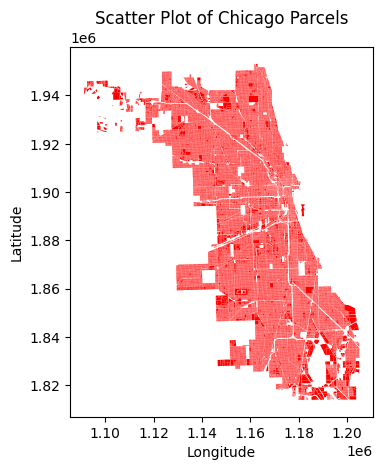

In [28]:
Visual_map = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Assignment 2 Data/Chicago_parcels.shp')

Visual_map.plot(marker='o', color='red', markersize=5)
plt.title('Scatter Plot of Chicago Parcels')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Task 4: Correlation Analysis

Correlation Matrix:
[[ 1.         -0.61223073]
 [-0.61223073  1.        ]]


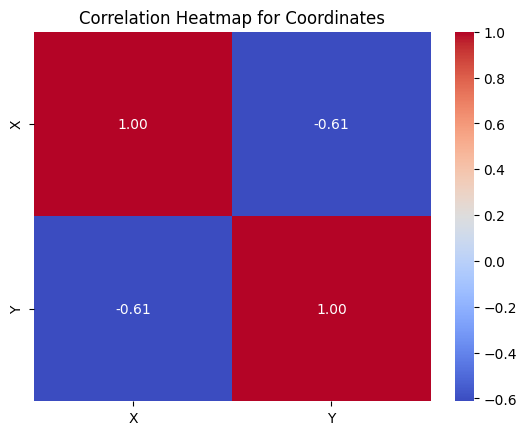

In [43]:
#attaching the coorinates_array
correlation_matrix = np.corrcoef(coordinates_array, rowvar=False)

#correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

#plotting the correlation matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', xticklabels=['X', 'Y'], yticklabels=['X', 'Y'])
plt.title('Correlation Heatmap for Coordinates')
plt.show()

Insights: There is a negative linear relationship between X and Y coordinates. The correlation coefficient of -0.6122 indicates a moderately negative correlation. Then X is exactly 1 or completely positively correlated is logical based on the map we can see

Task 5: K-Means Clustering & Task 6: Visualize results for each value of n_clusters, using multiple lonboard maps, and customized color ramps

/usr/local/lib/python3.10/dist-packages/geopandas/geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


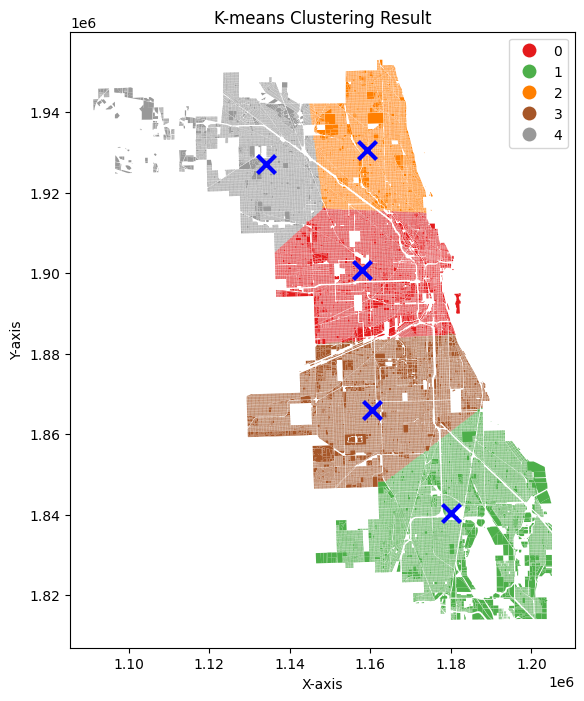

In [15]:
centroids = gdf['geometry'].centroid.apply(lambda point: (point.x, point.y)).tolist()
centroids_array = np.array(centroids)


kmeans = KMeans(n_clusters=5, random_state=42)
gdf['kmeans_cluster'] = kmeans.fit_predict(centroids_array) #writing this the exact same as the example, yet it gives me noise

gdf.plot(column='kmeans_cluster', categorical=True, legend=True, figsize=(8, 8), cmap='Set1')

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="b", #does this count as a customized color ramp???
    zorder=10,
)
plt.title('K-means Clustering Result')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

/usr/local/lib/python3.10/dist-packages/geopandas/geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


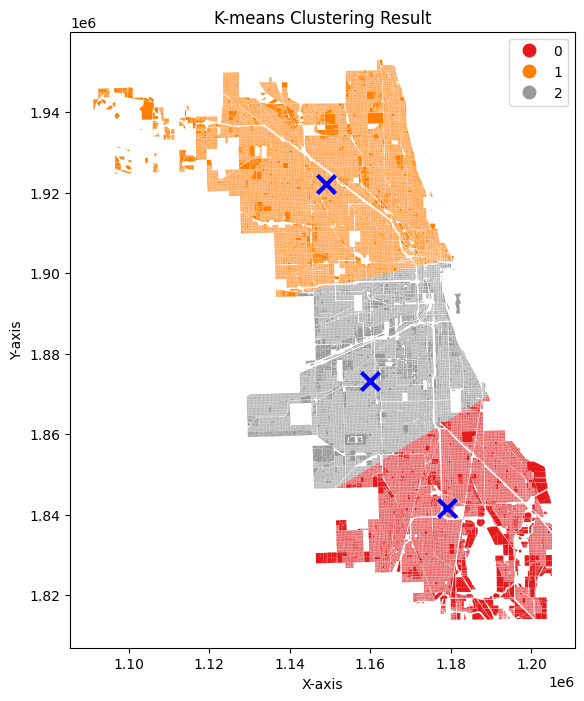

In [16]:
centroids = gdf['geometry'].centroid.apply(lambda point: (point.x, point.y)).tolist()
centroids_array = np.array(centroids)


kmeans = KMeans(n_clusters=3, random_state=42)
gdf['kmeans_cluster'] = kmeans.fit_predict(centroids_array) #writing this the exact same as the example, yet it gives me noise

gdf.plot(column='kmeans_cluster', categorical=True, legend=True, figsize=(8, 8), cmap='Set1')

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="b",
    zorder=10,
)
plt.title('K-means Clustering Result')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

Task 7: Evaulate the clustering results and choose optimal value for n_clusters. Justify

To evaluate clustering results, there are algorithms such as the gap method, silhouette method or the elbow method, but we have not yet been taught to use these methods. Instead, I simply visually assessed the data and find n_clusters of 3 to be the most logical for the length-wise layout of the data.

Task 8: DBSCAN Clustering

In [17]:
pip install scikit-learn matplotlib geopandas

In [18]:
from sklearn.cluster import DBSCAN

/usr/local/lib/python3.10/dist-packages/geopandas/geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)


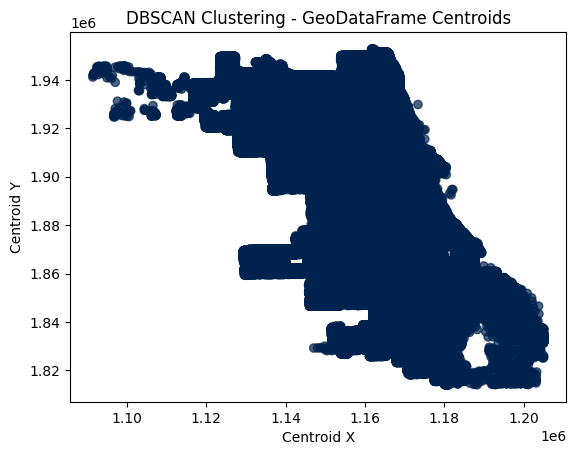

In [45]:
centroids = gdf['geometry'].centroid
coordinates = gpd.GeoSeries(centroids).apply(lambda point: [point.x, point.y]).tolist()

# Convert the coordinates to a NumPy array
coordinates_array = np.array(coordinates)

# Specify the epsilon (maximum distance between two samples for one to be considered as in the neighborhood of the other) and min_samples
epsilon = 0.5
min_samples = 3

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
gdf['dbscan_cluster'] = dbscan.fit_predict(coordinates_array)

#and plotting
plt.scatter(gdf['geometry'].centroid.x, gdf['geometry'].centroid.y, c=gdf['dbscan_cluster'], cmap='cividis', alpha=0.7)
plt.title('DBSCAN Clustering - GeoDataFrame Centroids')
plt.xlabel('Centroid X')
plt.ylabel('Centroid Y')
plt.show()

In [31]:
centroids = gdf['geometry'].centroid
coordinates = gpd.GeoSeries(centroids).apply(lambda point: [point.x, point.y]).tolist()

# Convert the coordinates to a NumPy array
coordinates_array = np.array(coordinates)

# Specify the epsilon (maximum distance between two samples for one to be considered as in the neighborhood of the other) and min_samples
epsilon = 1
min_samples = 5

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
gdf['dbscan_cluster'] = dbscan.fit_predict(coordinates_array)

/usr/local/lib/python3.10/dist-packages/geopandas/geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)


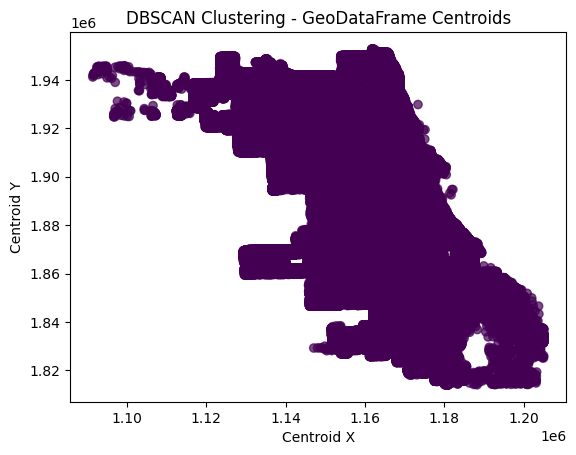

In [32]:
plt.scatter(gdf['geometry'].centroid.x, gdf['geometry'].centroid.y, c=gdf['dbscan_cluster'], cmap='viridis', alpha=0.7)
plt.title('DBSCAN Clustering - GeoDataFrame Centroids')
plt.xlabel('Centroid X')
plt.ylabel('Centroid Y')
plt.show()

/usr/local/lib/python3.10/dist-packages/geopandas/geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)


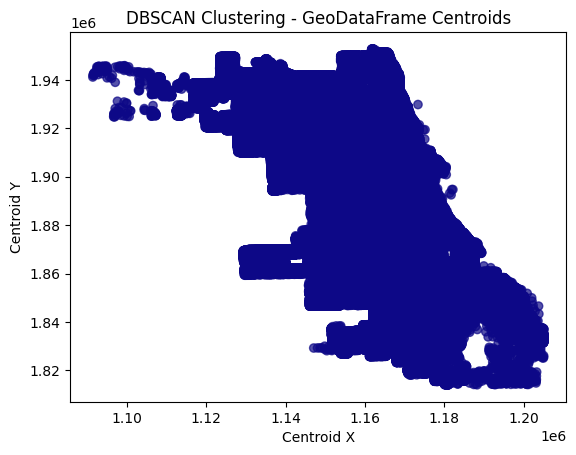

In [49]:
centroids = gdf['geometry'].centroid
coordinates = gpd.GeoSeries(centroids).apply(lambda point: [point.x, point.y]).tolist()

# Convert the coordinates to a NumPy array
coordinates_array = np.array(coordinates)

# Specify the epsilon (maximum distance between two samples for one to be considered as in the neighborhood of the other) and min_samples
epsilon = 1.5
min_samples = 7

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
gdf['dbscan_cluster'] = dbscan.fit_predict(coordinates_array)

#and plotting
plt.scatter(gdf['geometry'].centroid.x, gdf['geometry'].centroid.y, c=gdf['dbscan_cluster'], cmap='plasma', alpha=0.7)
plt.title('DBSCAN Clustering - GeoDataFrame Centroids')
plt.xlabel('Centroid X')
plt.ylabel('Centroid Y')
plt.show()

Task 9: Plot the clustering results for each comb of parameters, create plot matrix 3*3 (min_samples and eps)

In [40]:
def dbscan(data, epsilon, min_samples):
    # Initialize variables
    num_points = len(data)
    clusters = np.full(num_points, -1)  # -1 represents unassigned points
    visited = np.full(num_points, False)

    # Initialize cluster ID
    cluster_id = 0

    for point_index in range(num_points):
        if not visited[point_index]:
            visited[point_index] = True
            neighbors = find_neighbors(data, point_index, epsilon)

            # Check if the point is a core point
            if len(neighbors) >= min_samples:
                expand_cluster(data, point_index, neighbors, cluster_id, epsilon, min_samples, clusters, visited)
                cluster_id += 1

    return clusters

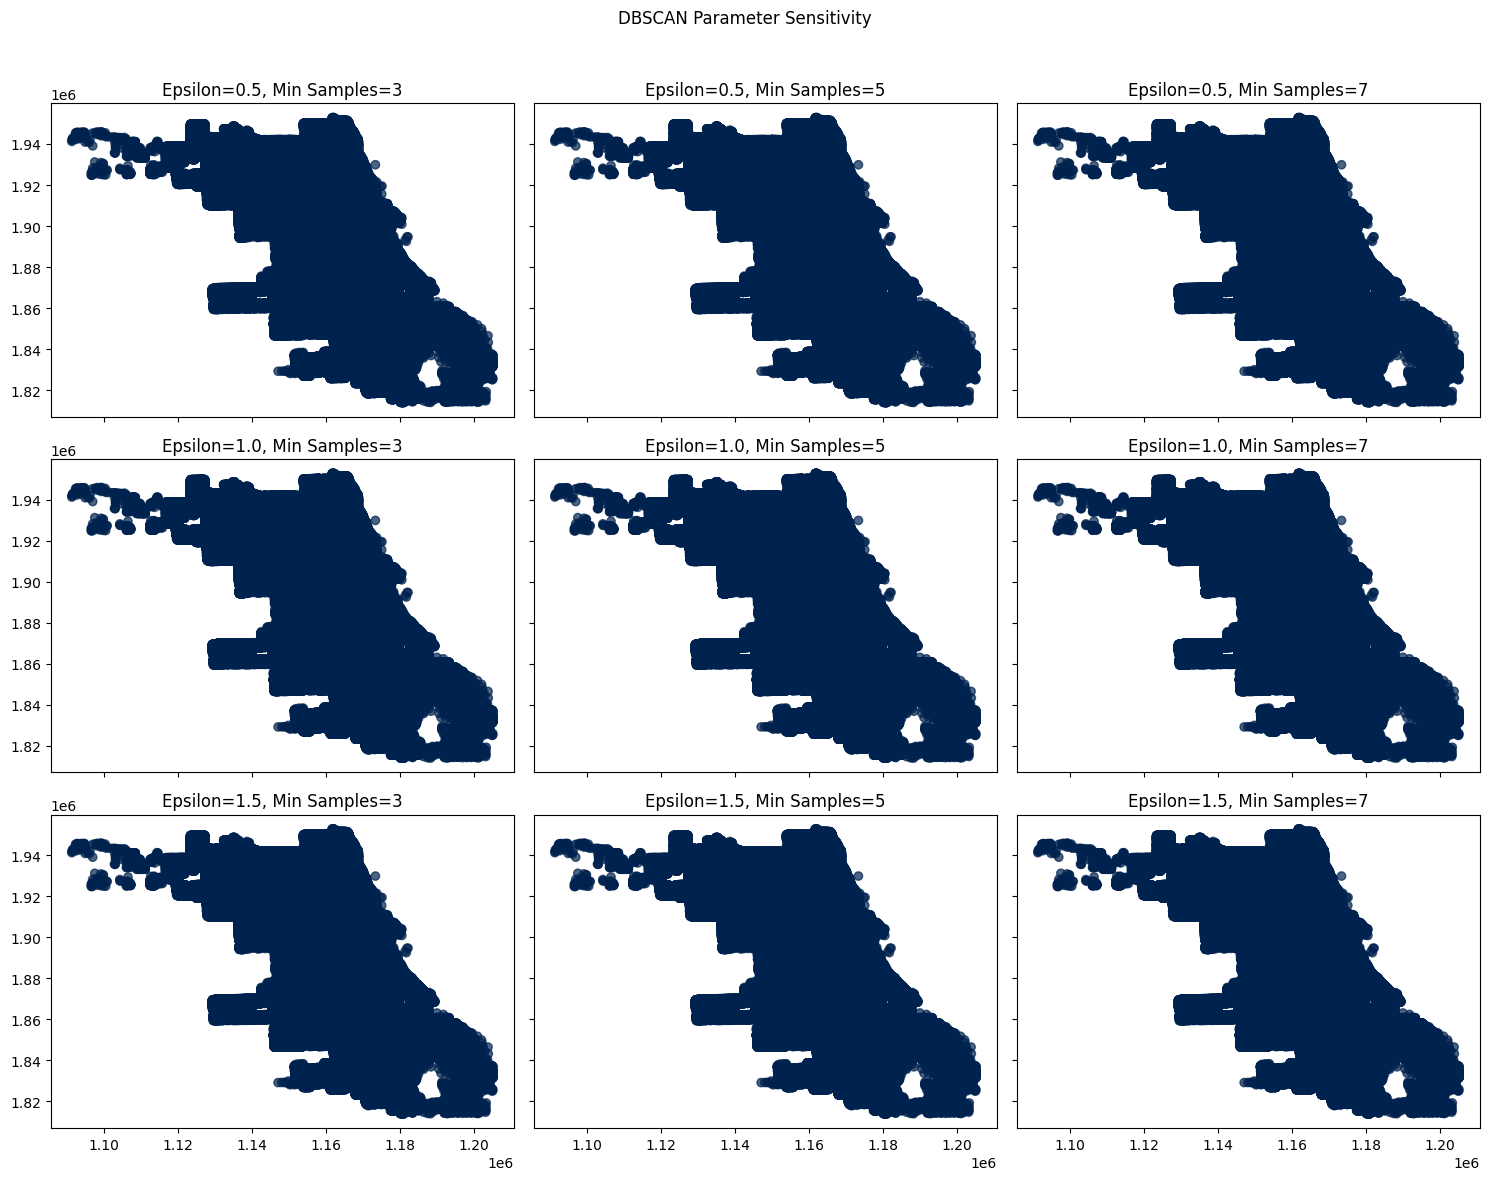

In [42]:
def visualize_dbscan_parameters(data, epsilon_values, min_samples_values):
    fig, axes = plt.subplots(len(epsilon_values), len(min_samples_values), figsize=(15, 12), sharex=True, sharey=True)
    fig.suptitle('DBSCAN Parameter Sensitivity')

    for i, epsilon in enumerate(epsilon_values):
        for j, min_samples in enumerate(min_samples_values):
            # Apply DBSCAN to the data here, and then use the results for the plots in the c parameter
            # Plot the clusters
            axes[i, j].scatter(gdf['geometry'].centroid.x, gdf['geometry'].centroid.y, c=cluster_matrix['eps=1.5_min_samples=7'], cmap='cividis', alpha=0.7)
            axes[i, j].set_title(f'Epsilon={epsilon}, Min Samples={min_samples}')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Example usage:
epsilon_values = [0.5, 1.0, 1.5]
min_samples_values = [3, 5, 7]

# Run your function to visualize DBSCAN parameters
visualize_dbscan_parameters(centroids_array, epsilon_values, min_samples_values)

Task 10: provide insights and evaluation of impact of changes in eps and min_samples and recommend suitable values for eps and min_samples

I would expect to see a visual difference, yet I cannot. I would expect that a change to the maximum distance between two samples would change the size and relationship within the DBSCAN, and the same in the minimum sample size. Yet I do not. Beyond those numbers applied to eps and min_samples here, I have tried numbers exponientally larger, and smaller, with no visual change.

## **End of Assignment 2 Part 6**